# Proyecto Mate 3 Red Neuronal

Este es mi proyecto practico final de la Materia de Matematicas 3 El objetivo era desarrollar una red neuronal que se encargaria de clasificar basandose en una serie de datos ingresados como lo son el Tamaño, el Peso, el Sabor, la Blandura, el Tiempo de Recoleccion, la Dureza y la Acidez **(Datos que ya en la base de datos vienen normalizados)**, determinar si la calidad de la banana es Buena o Mala

**Link del Datasets=** https://www.kaggle.com/datasets/l3llff/banana

Comienzo cargando tanto las librerias **Numpy** y **Pandas** junto a los datos de la base de datos **"Banana_quality.csv"**
y muestro su carga exitosa con el **data.head()**

In [52]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


from google.colab import files
ec= files.upload()

data = pd.read_csv("banana_quality.csv")
np.random.seed(5)

data.head()

Saving banana_quality.csv to banana_quality (1).csv


,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
7995,-6.414403,0.723565,1.134953,2.952763,0.297928,-0.156946,2.398091,Bad
7996,0.851143,-2.217875,-2.812175,0.489249,-1.323410,-2.316883,2.113136,Bad
7997,1.422722,-1.907665,-2.532364,0.964976,-0.562375,-1.834765,0.697361,Bad
7998,-2.131904,-2.742600,-1.008029,2.126946,-0.802632,-3.580266,0.423569,Bad
7999,-2.660879,-2.044666,0.159026,1.499706,-1.581856,-1.605859,1.435644,Bad


Con el **Data.Describe()** hago un analisis general de los datos dentro del archivo, datos que como se especifico al inicio ya de base estan normalizados para su uso

In [53]:
data.describe()
#Los datos ya vienen normalizados

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,-0.747802,-0.761019,-0.770224,-0.014441,-0.751288,0.781098,0.008725
std,2.136023,2.015934,1.948455,2.065216,1.996661,2.114289,2.293467
min,-7.998074,-8.283002,-6.434022,-6.959320,-7.570008,-7.423155,-8.226977
25%,-2.277651,-2.223574,-2.107329,-1.590458,-2.120659,-0.574226,-1.629450
50%,-0.897514,-0.868659,-1.020673,0.202644,-0.934192,0.964952,0.098735
75%,0.654216,0.775491,0.311048,1.547120,0.507326,2.261650,1.682063
max,7.970800,5.679692,7.539374,8.241555,6.293280,7.249034,7.411633


# Eliminar los valores Atipicos de la base de datos

Acontinuacion procedo a seleccionar las columnas con valores numericos (Que en este caso serian todas excepto "Quality") donde despues uso el Rango Intercualitico para cada columna seleccionada anteriormente, calculando cuales son los valores que quedan fuera del rango, agrego el numero excepcifico de la fila que contine dicho valor atipico a una lista que posteriormente usare para eliminarlas

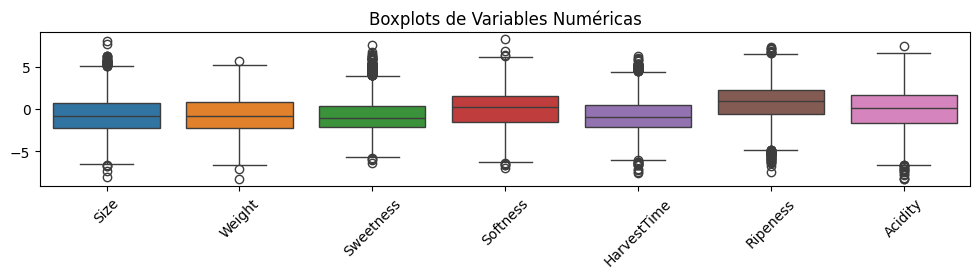

Estas son todas las filas con valores atipicos a eliminar :
[7, 27, 30, 40, 53, 67, 103, 106, 133, 135, 139, 149, 162, 178, 182, 186, 189, 210, 231, 232, 239, 252, 261, 309, 315, 316, 327, 363, 370, 376, 396, 402, 411, 425, 429, 439, 441, 451, 456, 461, 467, 482, 490, 519, 524, 529, 535, 538, 541, 543, 581, 582, 595, 597, 600, 602, 603, 626, 638, 668, 685, 686, 722, 740, 748, 766, 769, 770, 824, 844, 869, 877, 884, 909, 916, 927, 934, 944, 955, 957, 966, 986, 987, 1010, 1011, 1013, 1034, 1045, 1047, 1055, 1082, 1088, 1090, 1095, 1109, 1116, 1142, 1144, 1149, 1153, 1167, 1169, 1171, 1180, 1217, 1238, 1245, 1260, 1263, 1264, 1269, 1272, 1305, 1310, 1318, 1339, 1344, 1346, 1363, 1372, 1375, 1409, 1419, 1441, 1452, 1455, 1468, 1475, 1485, 1495, 1501, 1510, 1523, 1541, 1564, 1574, 1581, 1582, 1583, 1604, 1610, 1624, 1632, 1636, 1662, 1685, 1708, 1717, 1724, 1736, 1744, 1745, 1754, 1763, 1764, 1769, 1772, 1784, 1787, 1789, 1796, 1799, 1813, 1815, 1837, 1841, 1844, 1856, 1860, 1874, 1884, 189

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good


In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Se seleccionan solo las columnas numéricas para el análisis de valores atípicos
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Crear boxplots para cada variable numérica
#El boxplot me permite visualizar la dispersión, la mediana y la presencia de valores atípicos
plt.figure(figsize=(12, 2))
sns.boxplot(data=data[numeric_columns])
plt.title('Boxplots de Variables')
plt.xticks(rotation=45)
plt.show()

# Calcular el rango intercuartílico (IQR) para cada columna numérica
Q1 = data[numeric_columns].quantile(0.25)
Q3 = data[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Identificar valores atípicos utilizando el criterio del IQR
outliers = ((data[numeric_columns] < (Q1 - 1.5 * IQR)) | (data[numeric_columns] > (Q3 + 1.5 * IQR)))
atipicos = ((data[numeric_columns] < (Q1 - 1.5 * IQR)) | (data[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)
eliminar=[]
for i in range(data.shape[0]):
  if atipicos[i] == True:
    eliminar.append(i)
print("Estas son todas las filas con valores atipicos a eliminar :")
print(eliminar)
filtrados= data.drop(eliminar,axis=0)
print("-----------------------------------")
print("-----------------------------------")

print(outliers)
print("-----------------------------------")
print("-----------------------------------")
# Contar el número de valores atípicos por fila
num_outliers = outliers.sum()
num_filtrados = atipicos.sum()
print(num_outliers)
print(num_filtrados)

print("-----------------------------------")
print("-----------------------------------")
filtrados.head()


In [44]:
filtrados.describe()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity
count,7645.000000,7645.000000,7645.000000,7645.000000,7645.000000,7645.000000,7645.000000
mean,-0.786922,-0.796214,-0.869717,-0.034136,-0.768828,0.833754,-0.036637
std,2.097331,1.989871,1.782406,2.073277,1.951061,2.061357,2.262072
min,-6.516209,-6.609340,-5.708583,-6.290912,-6.054411,-4.795906,-6.564504
25%,-2.302424,-2.248351,-2.108109,-1.643439,-2.125319,-0.516895,-1.679108
50%,-0.921428,-0.907238,-1.039918,0.189836,-0.936640,1.016200,0.030460
75%,0.617910,0.705001,0.194520,1.554609,0.490633,2.293662,1.627904
max,5.026874,5.184198,3.932443,6.124278,4.397762,6.490461,6.630081


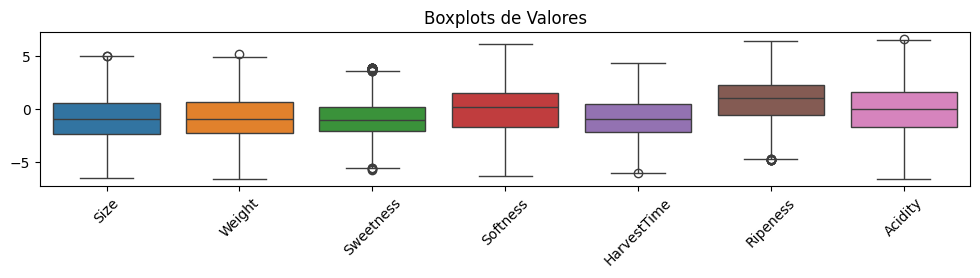

In [45]:
#Vuelvo a comprobar el grado de valores Atipicos
numeric_columns = filtrados.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(12, 2))
sns.boxplot(data=filtrados[numeric_columns])
plt.title('Boxplots de Valores')
plt.xticks(rotation=45)
plt.show()

Verifico si existen valores nulos o vacios dentro de **"Banana_quality.csv"** antes de su uso, y el resultado final demuestra que no hay espacio vacios o nulos dentro del archivo

In [55]:
#Verificar si existen valores nulos o vacios

filtrados.isnull().sum()

Size           0
Weight         0
Sweetness      0
Softness       0
HarvestTime    0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

Antes de empezar a usar los datos, es necesario que transforme la Columna **"Quality"** en datos numericos **Good=1 Bad=0**, para despues con el **Data.Head()** y el **Data.Tail()** verificar que se realizo el cambio

In [56]:
#Transformar los valores de la columna Quality en valores numericos Bueno=1 Malo=0

from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
for i in ['Quality']:
    filtrados[i] = encode.fit_transform(filtrados[i])

#Primeros elementos
filtrados.head()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,1
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,1
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,1
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,1
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,1


In [57]:
#Ultimos elementos
filtrados.tail()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
7995,-6.414403,0.723565,1.134953,2.952763,0.297928,-0.156946,2.398091,0
7996,0.851143,-2.217875,-2.812175,0.489249,-1.323410,-2.316883,2.113136,0
7997,1.422722,-1.907665,-2.532364,0.964976,-0.562375,-1.834765,0.697361,0
7998,-2.131904,-2.742600,-1.008029,2.126946,-0.802632,-3.580266,0.423569,0
7999,-2.660879,-2.044666,0.159026,1.499706,-1.581856,-1.605859,1.435644,0


Muestro la correlacion que existe entre las columnas a trabajar y su porcentaje de correlacion (Que en este caso la que nos interesa es con la columna **"Quality"**)

<Axes: >

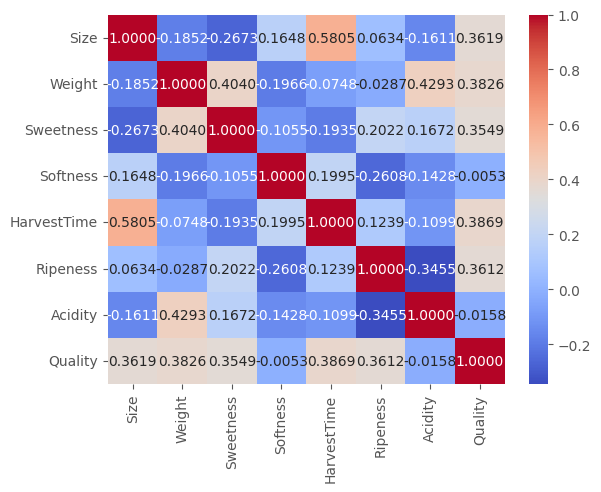

In [87]:
#Grafica y Correlacion
df = filtrados.copy()
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".4f")

(5351, 7)
(2294, 7)
(5351,)
(2294,)
Precision =  23.95 %
Precision Mejorable =  79.97 %


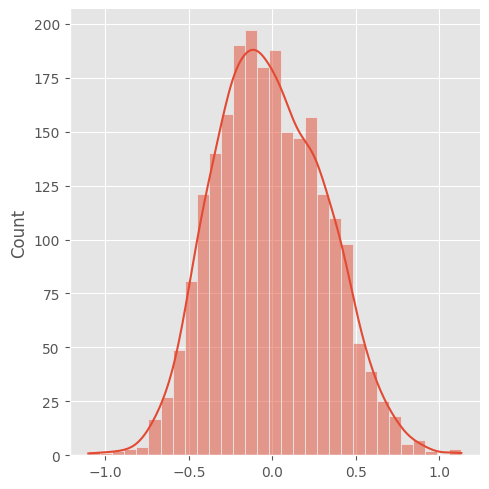

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor

# Extraer columnas de entrada, todas excepto la ultima Quality

x = filtrados.iloc[:,0:7].values

# Extraer columna de Quality

y = filtrados.iloc[:, 7].values

X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.30)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

regression = LinearRegression()
regression.fit(X_train,Y_train)

reg_predict = regression.predict(X_test)

score = r2_score(reg_predict, Y_test)
print("Precision = ", float("{:.2f}".format(score*100)), "%")

gbr = GradientBoostingRegressor(random_state=0)
gbr.fit(X_train, Y_train)
boosted_score = gbr.score(X_test, Y_test)
print("Precision Mejorable = ", float("{:.2f}".format(boosted_score*100)), "%")
sns.displot(reg_predict-Y_test, kde = True)

Grafica que muestra el porcentaje o division de **"Buenos" y "Malos"** bananas dentro de la Columna **"Quality"**, estando es este caso divididas **51.26% Buenos 48.74% Malos**

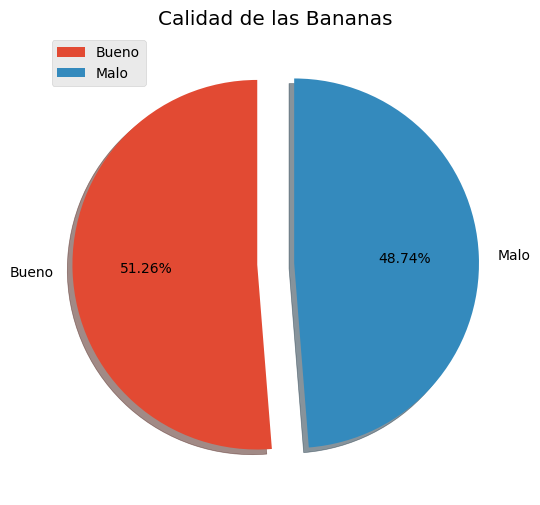

In [60]:
#Grafica de porcentaje de bananas Buenas y Malas

import matplotlib.pyplot as plt

plt.figure(figsize=[6,6])
valores=["Bueno","Malo"]
plt.style.use('ggplot')
plt.title("Calidad de las Bananas")
plt.pie(filtrados['Quality'].value_counts(),labels=valores,autopct='%.2f%%',shadow=True,explode=(0.1,0.1),startangle=90)
plt.axis=('equal')
plt.legend(loc="upper left")

plt.show()

Apartir de este momento es que comienza lo que seria la Red Neuronal, donde para probar y optimizar posibles cambios esta empieza con una Seed especifica

Para este proceso combine tanto lo que seria el cuerpo de la Red Neuronal con su parte de entrenamiento, con una tasa de aprendizaje de **0.05** y con un total de **2_000** repeticiones, en un principio para datos de entrada se habian dejado de lado 2 de las 7 columnas (Exceptuando obviamente la ultima **"Quality"** que tomaria el papel de los valores de Salida) por su baja relacion, pero tras pruebas y consejos del profesor, decidi incluirlas, cosa que aumento el porcentaje de precision de un **84%** casi **85%** aun casi **90%**

Como Valores de Entrenamiento y Prueba, se tomo una relacion **70% 30%** para el entrenamiento, donde con un total de **8000** filas que tras ser filtrados los valores atipicos quedaron **7645**, se toman **5351** para el entrenamiento y los otros **2294** para las pruebas, donde en el Descenso de Gradiente en cada vuelta se toma una nueva fila aleatoria con el objetivo de evitar un **Overfitting** como se muestra en el grafico de la presicion

In [83]:
np.random.seed(5) #Cargo la semilla

aprendizaje = 0.05  # tasa de aprendizaje

# Extraer columnas de entrada (Size,Weight,Sweetness,HarvestTime,Ripeness)
#entrada = data.iloc[:,[0,1,2,4,5]].values (Omitiendo la columna 3 y 6)

entrada = filtrados.iloc[:,0:7].values #Todas las columnas excepto la ultima (Ingreso 7 entradas)

# Extraer columna de Quality
salida = filtrados.iloc[:, 7].values

# Dividir los conjuntos de datos de entrenamiento y prueba
# 30 % en prueba y un 70 % en entrenamiento

X_train, X_test, Y_train, Y_test = train_test_split(entrada, salida,
    test_size=0.30)
n = X_train.shape[0]
print("se estan tomando",n,"Datos de entrenamiento")

# Construir red neuronal con pesos y sesgos inicializados aleatoriamente

w_hidden = np.random.rand(7, 7)
w_output = np.random.rand(1, 7)

b_hidden = np.random.rand(7, 1)
b_output = np.random.rand(1, 1)

# Funciones de activacion

relu = lambda x: np.maximum(x, 0)
logistic = lambda x: 1 / (1 + np.exp(-x))

# Ejecutar entradas a traves de la red neuronal para obtener salidas predichas

def forward_prop(X):
    Z1 = w_hidden @ X + b_hidden
    A1 = relu(Z1)
    Z2 = w_output @ A1 + b_output
    A2 = logistic(Z2)
    return Z1, A1, Z2, A2

# Derivadas de las funciones de activacion

d_relu = lambda x: x > 0
d_logistic = lambda x: np.exp(-x) / (1 + np.exp(-x)) ** 2

# Devuelve pendientes para pesos y sesgos usando la regla de la cadena

def backward_prop(Z1, A1, Z2, A2, X, Y):
    dC_dA2 = 2 * A2 - 2 * Y
    dA2_dZ2 = d_logistic(Z2)
    dZ2_dA1 = w_output
    dZ2_dW2 = A1
    dZ2_dB2 = 1
    dA1_dZ1 = d_relu(Z1)
    dZ1_dW1 = X
    dZ1_dB1 = 1

    dC_dW2 = dC_dA2 @ dA2_dZ2 @ dZ2_dW2.T

    dC_dB2 = dC_dA2 @ dA2_dZ2 * dZ2_dB2

    dC_dA1 = dC_dA2 @ dA2_dZ2 @ dZ2_dA1

    dC_dW1 = dC_dA1 @ dA1_dZ1 @ dZ1_dW1.T

    dC_dB1 = dC_dA1 @ dA1_dZ1 * dZ1_dB1

    return dC_dW1, dC_dB1, dC_dW2, dC_dB2

# Descenso de Gradiente

x_trein_lista_presicion=[]
x_train_lista_presicion=[]

for i in range(2_000):

    # selecciona aleatoriamente uno de los datos de entrenamiento

    idx = np.random.choice(n, 1, replace=False)
    X_sample = X_train[idx].transpose()
    Y_sample = Y_train[idx]

    # pasamos los datos elegidos aleatoriamente a la red neuronal

    Z1, A1, Z2, A2 = forward_prop(X_sample)

    # distribuir error a través de la retropropagacion
    # y devolver pendientes para pesos y sesgos

    dW1, dB1, dW2, dB2 = backward_prop(Z1, A1, Z2, A2, X_sample, Y_sample)

    # actualizamos los pesos y sesgos

    w_hidden -= aprendizaje * dW1
    b_hidden -= aprendizaje * dB1
    w_output -= aprendizaje * dW2
    b_output -= aprendizaje * dB2

    # Calculo de precisión
    test_predictions = forward_prop(X_test.transpose())[3] # me interesa solo la capa de salida, A2
    test_comparisons = np.equal((test_predictions >= .5).flatten().astype(int), Y_test)
    presicion = sum(test_comparisons.astype(int) / X_test.shape[0])
    x_trein_lista_presicion.append(presicion)

    test_predictions = forward_prop(X_train.transpose())[3] # me interesa solo la capa de salida, A2
    test_comparisons = np.equal((test_predictions >= .5).flatten().astype(int), Y_train)
    presicion_2 = sum(test_comparisons.astype(int) / X_train.shape[0])
    x_train_lista_presicion.append(presicion_2)

print("Precision de los X de entrenamiento: ", presicion_2)
print("Precision de los X de prueba: ", presicion)

se estan tomando 5351 Datos de entrenamiento
Precision de los X de entrenamiento:  0.9061857596711125
Precision de los X de prueba:  0.9023539668701256


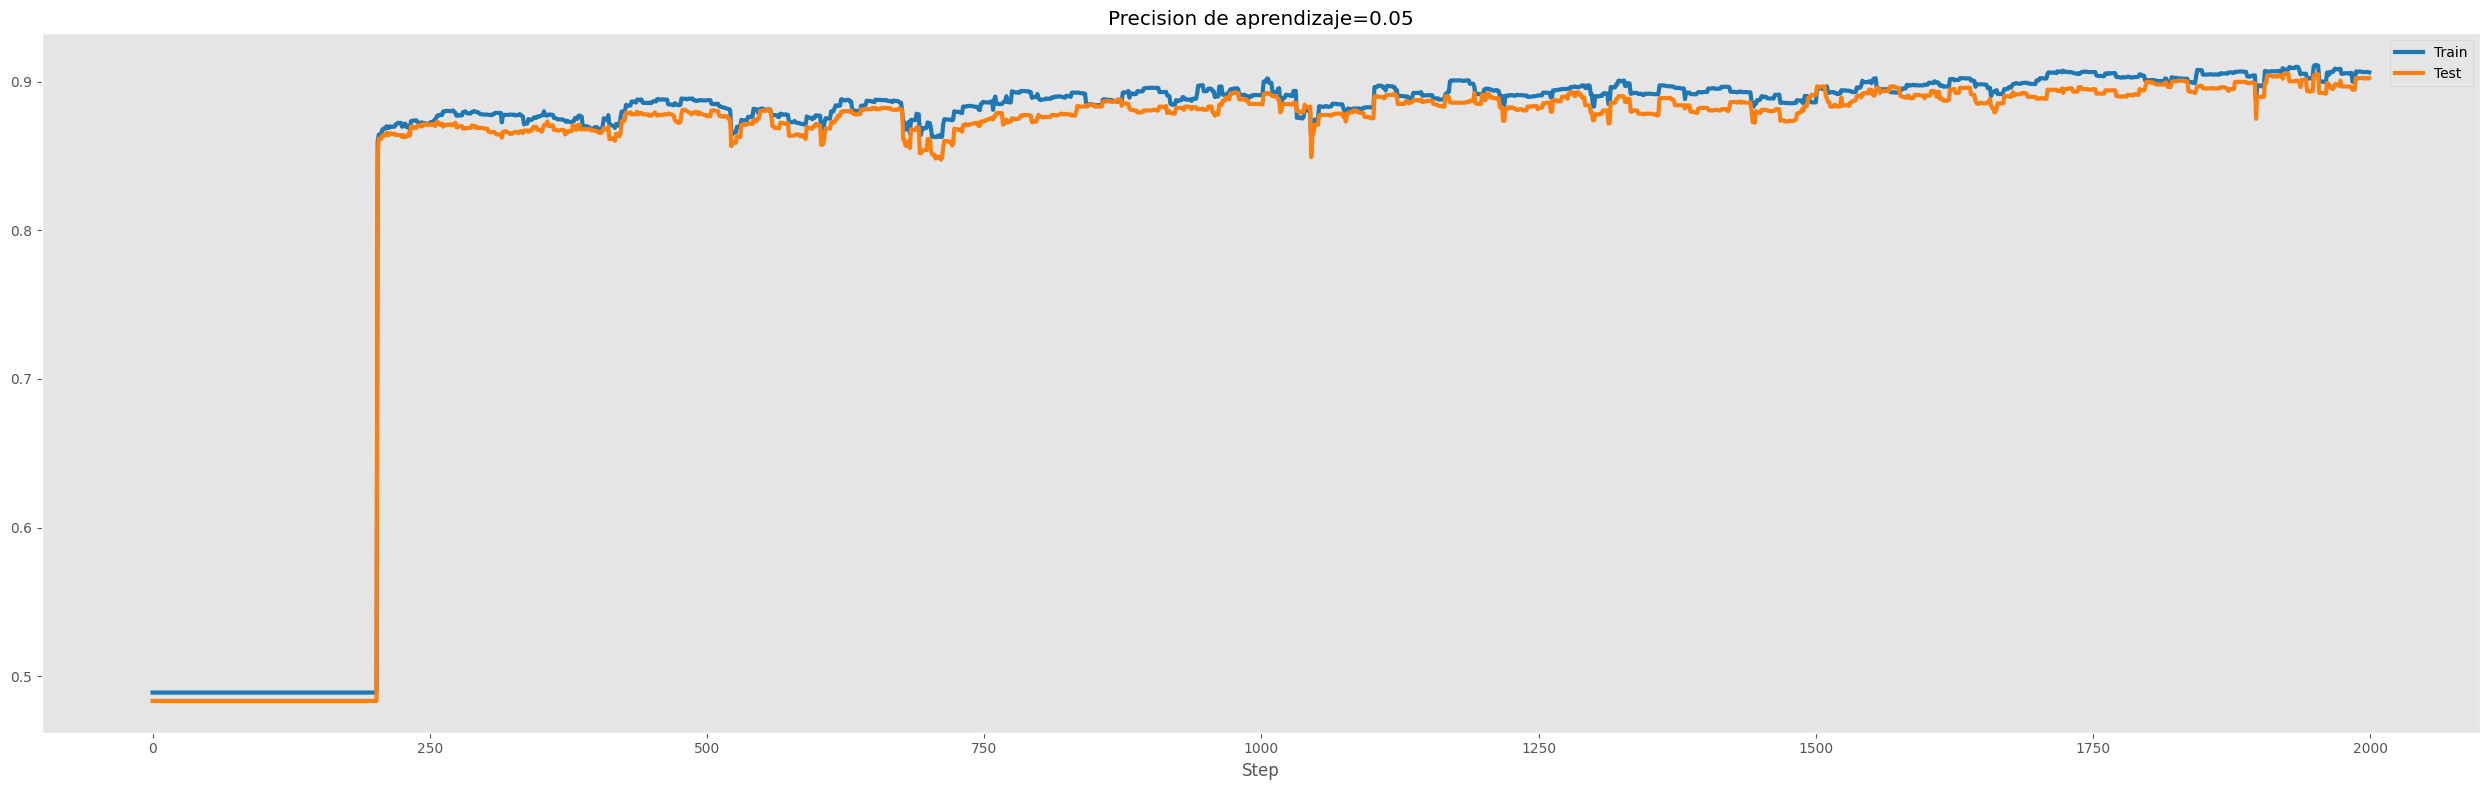

In [85]:
#grafico de la curva de aprendizaje

fmt_train= { "color":"tab:blue","ls":"solid","lw":3,}

fmt_test= { "color":"tab:orange","ls":"solid","lw":3,}

fig, ax = plt.subplots(1,1,figsize=(25,8))
ax.plot(x_train_lista_presicion, label='Train', **fmt_train)
ax.plot(x_trein_lista_presicion, label='Test', **fmt_test)

ax.grid(which="both")
ax.legend()
ax.set_title(f"Precision de {aprendizaje=}")
ax.set_xlabel("Step")

fig.tight_layout()
plt.show()

Aqui se pone en practica la red neuronal tras una vez entrenada, donde su labor es una vez ingresados los datos del Tamaño, el Peso, el Sabor, la Blandura, el Tiempo de Recoleccion, la Dureza y la Acidez de la banana, la Red Neuronal debera predecir haciendo uso de **Relu** y **Logistic**, si el calculo final da mayor a **0.5** debera devolver que la Banana esta **"Buena"**, y si no es el caso, devolvera **"Mala"**

In [82]:
#Ingreso de datos de la banana y su prediccion

def predict_probability(Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity):
    X = np.array([[Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity]]).transpose()
    Z1, A1, Z2, A2 = forward_prop(X)
    return A2

def predict_font_shade(Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity):
    output_values = predict_probability(Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity)
    print(output_values)
    if output_values > .5:
        return "Bueno"
    else:
        return "Malo"

Size=float(input("Ingrese el Tamaño:"))
Weight=float(input("Ingrese el Peso:"))
Sweetness=float(input("Ingrese la Sabor:"))
Softness=float(input("Ingrese la Blandura:"))
HarvestTime=float(input("Ingrese el Tiempo de Recoger:"))
Ripeness=float(input("Ingrese la Dureza:"))
Acidity=float(input("Ingrese la Acidez:"))
print("Tras el analisis la red neuronal determina que esa banana esta",predict_font_shade(Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity))



Ingrese el Tamaño:0.43337458
Ingrese el Peso:-4.6680703
Ingrese la Sabor:-1.0665162
Ingrese la Blandura:-2.0685475
Ingrese el Tiempo de Recoger:0.43970254
Ingrese la Dureza:4.182322
Ingrese la Acidez:0.89013046
[[0.02766699]]
Tras el analisis la red neuronal determina que esa banana esta Malo


Esta es una Comparacion usando el metodo de Scikit-Learn, tanto como red neuronal como en precision

Se empieza nuevamente con la misma semilla, tasa de aprendizaje, repeticiones y division de elementos **70% Entrenamiento 30% Prueba**, pero a comparacion de la red neuronal hecha a mano, en el calculo final de precision esta demuestra un casi **97%** de exactitud tras entrenarse, casi un **8%** mas que la anterior, donde al final a la hora de ingresarle los valores de la banana, tambien logro dar una prediccion correcta sobre la Calidad **"Quality"**    

In [86]:
# Comparacion usando scikit-learn

np.random.seed(5) #Cargo la semilla

# cargar datos
from sklearn.neural_network import MLPClassifier

# Extraer variables de entrada (todas las filas, todas las columnas menos la ultima)
X = filtrados.values[:,0:7]

# Extraer columna de salida (todas las filas, ultima columna)
Y = filtrados.values[:, 7]

# Separar los datos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)

nn = MLPClassifier(solver='sgd',
                   hidden_layer_sizes=(7, ),
                   activation='relu',
                   max_iter=2_000,
                   learning_rate_init=0.05)

nn.fit(X_train, Y_train)

# Imprimir pesos y sesgos
print(nn.coefs_)
print(nn.intercepts_)

print("Puntaje del Entrenamiento: %f" % nn.score(X_train, Y_train))
print("Puntaje de la Prueba: %f" % nn.score(X_test, Y_test))


[array([[ 0.40681626, -0.53130229, -0.1195091 ,  0.41025253,  0.45919396,
        -0.08177773,  0.04649076],
       [-1.44097878,  0.4855373 , -0.99085063, -0.28929901,  0.32053441,
        -1.22304439, -0.5034306 ],
       [-0.77500168,  0.61345677, -1.03036916,  1.69231705,  0.66621591,
         0.34743631,  0.27696224],
       [ 0.96937075, -0.73257542, -0.09064575,  0.13893884,  0.40625825,
         0.45600185,  1.35929092],
       [ 0.07666439, -0.72889566, -0.26977544, -0.38388761,  0.09995571,
        -0.72778107, -0.06227011],
       [-1.38934495,  0.39020378, -0.98469951, -0.63493291, -0.30127171,
        -0.59359618, -1.01300238],
       [-0.19951806,  0.7230658 , -0.71688881,  0.56346415,  0.1249366 ,
         0.85282344,  0.88740306]]), array([[ 1.91513179],
       [ 1.12741277],
       [-1.34944079],
       [ 1.75702856],
       [ 0.48853886],
       [-1.53193919],
       [-1.71814852]])]
[array([ 1.67453017, -0.47876597,  0.87750761, -0.77063687, -0.39435343,
        1.45

In [64]:
#Ingreso de datos de la banana y su prediccion, ahora usando el modelo de scikit-learn

def prediccion(Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity) :
   valores=(Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity)
   valores = np.array(valores).reshape(1, -1)
   resultado=nn.predict(valores)
   print("prediccion:", resultado)
   if resultado > 0.5:
      return "Bueno"
   else:
      return "Malo"

Size=float(input("Ingrese el Tamaño:"))
Weight=float(input("Ingrese el Peso:"))
Sweetness=float(input("Ingrese la Sabor:"))
Softness=float(input("Ingrese la Blandura:"))
HarvestTime=float(input("Ingrese el Tiempo de Recoger:"))
Ripeness=float(input("Ingrese la Dureza:"))
Acidity=float(input("Ingrese la Acidez:"))
print("Tras el analisis la red neuronal determina que esa banana esta",prediccion(Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity))



Ingrese el Tamaño:0.43337458
Ingrese el Peso:-4.6680703
Ingrese la Sabor:-1.0665162
Ingrese la Blandura:-2.0685475
Ingrese el Tiempo de Recoger:0.43970254
Ingrese la Dureza:4.182322
Ingrese la Acidez:0.89013046
prediccion: [0.]
Tras el analisis la red neuronal determina que esa banana esta Malo
